In [99]:
# import the necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.ascii 
import astropy.constants as ac
import astropy.units as u
import math

In [80]:
# load the data from the file
tab = astropy.io.ascii.read("PS_2020.12.15_09.21.06.csv") # the data format is astro table right now 
data = tab.to_pandas() # change our data format into dataframe for easy-use 

# take an overvew of the data set we load
data.head() # if you put nothing into the (), you will get the first 5 rows 

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
2,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
3,14 Her b,14 Her,1,1,1,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-09-04,2017-03,2018-09-06
4,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,...,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,2018-09-04,2017-03,2018-09-06


In [84]:
# take an overview of all the Column
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

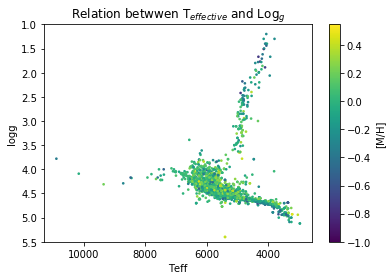

In [127]:
# plot the HR diagram of the whole planets
teff = tab["st_teff"] # get effective temperature from the column "st_teff"
logg = tab["st_logg"] # gravity
met = tab["st_met"] # metalicity

# the function should look like 
# plt.scatter(number for x axis, numbers for y aixs, c = number for the colorbar )
plt.scatter(teff, logg, c=met, lw=0, s=7, cmap="viridis") 
plt.gca().invert_xaxis()

# define the x, y axis and the colorbar
plt.xlabel("Teff")
plt.ylabel("logg")
plt.colorbar(label="[M/H]")

# re-set the range of the y aixs
plt.ylim(ymin = 5.5)
plt.ylim(ymax = 1)
#plt.xlim(xmin = 3500)
#plt.xlim(xmax = 11000)

# define the title of the plot
plt.title("Relation betwwen T$_{effective}$ and Log$_{g}$")

# save the plot 
plt.savefig('Relation betwwen Teff and logg.png')

In [42]:
# overveiw how many and how much discoverymethod in the data file
for discoverymethod, discoverymethod_number in data.groupby('discoverymethod', sort=True):
    print(discoverymethod, len(discoverymethod_number) )

Astrometry 1
Disk Kinematics 1
Eclipse Timing Variations 16
Imaging 51
Microlensing 106
Orbital Brightness Modulation 6
Pulsar Timing 7
Pulsation Timing Variations 2
Radial Velocity 821
Transit 3275
Transit Timing Variations 21


## · Radial Velocity

## $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

## Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

## $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

## Define the semi-major axis as an array [0.01, 0.1, 1, 10, 100, 1000]AU

## Using Kepler's third law to determine the period, P

## P = a<sup>3/2</sup>

In [133]:
# Radial Velocity limitation
sma_arr = 10.0**(np.arange(6)-2) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.Msun * np.sqrt(sma_arr / ac.G / (0.5 * u.Msun)) 

period_arr = (sma_arr / u.AU)**(3/2) * 365 * u.day

radius_arr = (m_p_arr.decompose().to(u.Mjup).value)**(0.59) * 1 * u.Rjup

In [135]:
# Imaging limitation
sma_min = df[ df["discoverymethod"] == "Imaging" ].pl_orbsmax.min()

mass_j_min = data[data["discoverymethod"] == "Imaging" ].pl_bmassj.min()

period_min = data[data["discoverymethod"] == "Imaging" ].pl_orbper.min()

radius_j_min = df[ df["discoverymethod"] == "Imaging" ].pl_radj.min()

In [136]:
# define the mass for the solar system planets in jupiter mass 
Mass_j_Mercury = 0.330 / 1898

Mass_j_Venus = 4.87 / 1898

Mass_j_Earth = 5.97 / 1898

Mass_j_Mars = 0.642 / 1898

Mass_j_Jupiter = 1

Mass_j_Saturn = 568 / 1898

Mass_j_Uranus = 86.8 / 1898

Mass_j_Neptune = 102 / 1898

In [137]:
# define the period for the solar system planets
Period_Mercury = 88

Period_Venus = 224.7

Period_Earth = 365.2

Period_Mars = 687

Period_Jupiter = 4331

Period_Saturn = 10747

Period_Uranus = 30589

Period_Neptune = 59800

In [138]:
# define the semi-major axis for the solar system planets
SemiMajor_Axis_Mercury = 0.3871

SemiMajor_Axis_Venus = 0.7233

SemiMajor_Axis_Earth = 1

SemiMajor_Axis_Mars = 1.5273

SemiMajor_Axis_Jupiter = 5.2018

SemiMajor_Axis_Saturn = 9.5388

SemiMajor_Axis_Uranus = 19.1914

SemiMajor_Axis_Neptune = 30.0611

In [139]:
# define the radius for the solar system planets in jupiter radius
Radius_Mercury = 2440 / 69911

Radius_Venus = 6052 / 69911

Radius_Earth = 6371 / 69911
 
Radius_Mars = 3390 / 69911

Radius_Jupiter = 1 

Radius_Saturn = 58232 / 69911

Radius_Uranus = 25362 / 69911

Radius_Neptune = 24622 / 69911

In [140]:
# base on the discovery menthod to make different data sets
Discoverymethod = tab['discoverymethod']

Index_RadialVelocity = np.where(Discoverymethod == "Radial Velocity")
RadialVelocity = tab[Index_RadialVelocity]

Index_Transit = np.where(Discoverymethod == "Transit")
Transit = tab[Index_Transit]

Index_Microlensing = np.where(Discoverymethod == "Microlensing")
Microlensing = tab[Index_Microlensing]

Index_Imaging = np.where(Discoverymethod == "Imaging")
Imaging = tab[Index_Imaging]
                     
Index_TransitTimingVariations = np.where(Discoverymethod == "Transit Timing Variations")
TransitTimingVariations = tab[Index_TransitTimingVariations]

Index_OrbitalBrightnessModulation = np.where(Discoverymethod == "Orbital Brightness Modulation")
OrbitalBrightnessModulation = tab[Index_OrbitalBrightnessModulation]

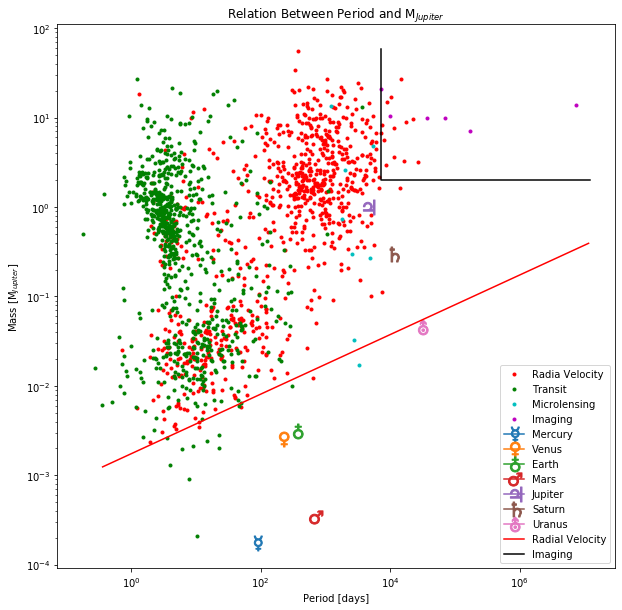

In [147]:
# Mass - Period plot
# pl_bmassj: Planet Mass or Mass*sin(i) [Jupiter Mass]
Mass_j_RadialVelocity = RadialVelocity["pl_bmassj"]
Mass_j_Transit= Transit["pl_bmassj"]
Mass_j_Microlensing= Microlensing["pl_bmassj"]
Mass_j_Imaging= Imaging["pl_bmassj"]
Mass_j_TransitTimingVariations= TransitTimingVariations["pl_bmassj"]
Mass_j_OrbitalBrightnessModulation= OrbitalBrightnessModulation["pl_bmassj"]

# pl_orbper: Orbital Period [days]
Period_RadialVelocity = RadialVelocity["pl_orbper"]
Period_Transit = Transit["pl_orbper"]
Period_Microlensing = Microlensing["pl_orbper"]
Period_Imaging = Imaging["pl_orbper"]
#Period_TransitTimingVariations = TransitTimingVariations["pl_orbper"]
#Period_OrbitalBrightnessModulation = OrbitalBrightnessModulation["pl_orbper"]
# make the plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plt.plot(Period_RadialVelocity,Mass_j_RadialVelocity, "r.", label='Radia Velocity')
plt.plot(Period_Transit, Mass_j_Transit, "g.",label='Transit')
plt.plot(Period_Microlensing, Mass_j_Microlensing, "c.", label='Microlensing')
plt.plot(Period_Imaging, Mass_j_Imaging, "m.", label='Imaging')
#plt.plot(Period_TransitTimingVariations, Mass_j_TransitTimingVariations, "y.")
#plt.plot(Period_OrbitalBrightnessModulation, Mass_j_OrbitalBrightnessModulation, "k.")

plt.plot(Period_Mercury, Mass_j_Mercury, marker='$\u263F$', ms=15, label= 'Mercury')
plt.plot(Period_Venus, Mass_j_Venus, marker='$\u2640$', ms=15, label= 'Venus')
plt.plot(Period_Earth, Mass_j_Earth, marker='$\u2641$', ms=15, label= 'Earth')
plt.plot(Period_Mars, Mass_j_Mars, marker='$\u2642$', ms=15, label= 'Mars')
plt.plot(Period_Jupiter, Mass_j_Jupiter, marker='$\u2643$', ms=15, label= 'Jupiter')
plt.plot(Period_Saturn, Mass_j_Saturn, marker='$\u2644$', ms=15, label= 'Saturn')
plt.plot(Period_Uranus, Mass_j_Uranus, marker='$\u26E2$', ms=15, label= 'Uranus')

# plot the radial velocity limitation
plt.plot(period_arr.value, m_p_arr.decompose().to(u.Mjup), color="red", label='Radial Velocity')

# plot the imagin limitation
period_max = plt.gca().get_xlim()[1]
mass_j_max = plt.gca().get_ylim()[1]
plt.plot([period_min, period_min, period_max], [mass_j_max, mass_j_min, mass_j_min], color="black", label="Imaging" )



# define the scale of the plot
plt.xscale("log")
plt.yscale("log")

# add the title 
plt.title('Relation Between Period and M$_{Jupiter}$')

# labels for x and y axis
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")

# show the plot
ax.legend();

plt.savefig("1.png")

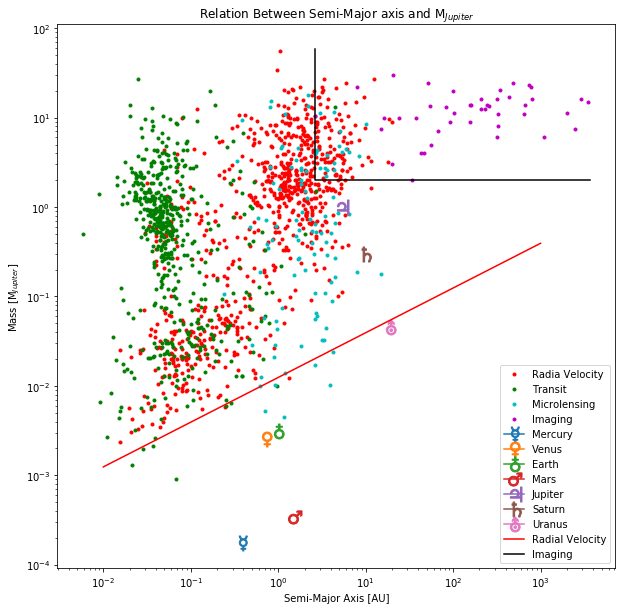

In [146]:
# Mass-Semi-major axis plot
# pl_orbsmax: Orbit Semi-Major Axis [au])
SemiMajor_Axis_RadialVelocity = RadialVelocity['pl_orbsmax']
SemiMajor_Axis_Transit = Transit['pl_orbsmax']
SemiMajor_Axis_Microlensing = Microlensing['pl_orbsmax']
SemiMajor_Axis_Imaging = Imaging['pl_orbsmax']
#SemiMajor_Axis_TransitTimingVariations = TransitTimingVariations['pl_orbsmax']
#SemiMajor_Axis_OrbitalBrightnessModulation = OrbitalBrightnessModulation['pl_orbsmax']

# make the plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plt.plot(SemiMajor_Axis_RadialVelocity, Mass_j_RadialVelocity, "r.", label='Radia Velocity')
plt.plot(SemiMajor_Axis_Transit, Mass_j_Transit, "g.", label='Transit')
plt.plot(SemiMajor_Axis_Microlensing, Mass_j_Microlensing, "c.", label='Microlensing')
plt.plot(SemiMajor_Axis_Imaging, Mass_j_Imaging, "m.", label='Imaging')
#plt.plot(SemiMajor_Axis_TransitTimingVariations, Mass_j_TransitTimingVariations, "y.")
#plt.plot(SemiMajor_Axis_OrbitalBrightnessModulation, Mass_j_OrbitalBrightnessModulation, "k.")

plt.plot(SemiMajor_Axis_Mercury, Mass_j_Mercury, marker='$\u263F$',ms=15, label= 'Mercury')
plt.plot(SemiMajor_Axis_Venus, Mass_j_Venus, marker='$\u2640$',ms=15, label= 'Venus')
plt.plot(SemiMajor_Axis_Earth, Mass_j_Earth, marker='$\u2641$',ms=15, label= 'Earth')
plt.plot(SemiMajor_Axis_Mars, Mass_j_Mars, marker='$\u2642$',ms=15, label= 'Mars')
plt.plot(SemiMajor_Axis_Jupiter, Mass_j_Jupiter, marker='$\u2643$',ms=15, label= 'Jupiter')
plt.plot(SemiMajor_Axis_Saturn, Mass_j_Saturn, marker='$\u2644$',ms=15, label= 'Saturn')
plt.plot(SemiMajor_Axis_Uranus, Mass_j_Uranus, marker='$\u26E2$',ms=15, label= 'Uranus')

# plot the radial velocity limitation
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.Mjup), color="red", label='Radial Velocity')

# plot the imagin limitation
sma_max = plt.gca().get_xlim()[1]
mass_j_max = plt.gca().get_ylim()[1]
plt.plot([sma_min, sma_min, sma_max], [mass_j_max, mass_j_min, mass_j_min], color="black", label="Imaging" )

# define the scale of the plot
plt.xscale("log")
plt.yscale("log")

# add the title 
plt.title('Relation Between Semi-Major axis and M$_{Jupiter}$')

# labels for x and y axis
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")

# show the plot
ax.legend()

plt.savefig("2.png")

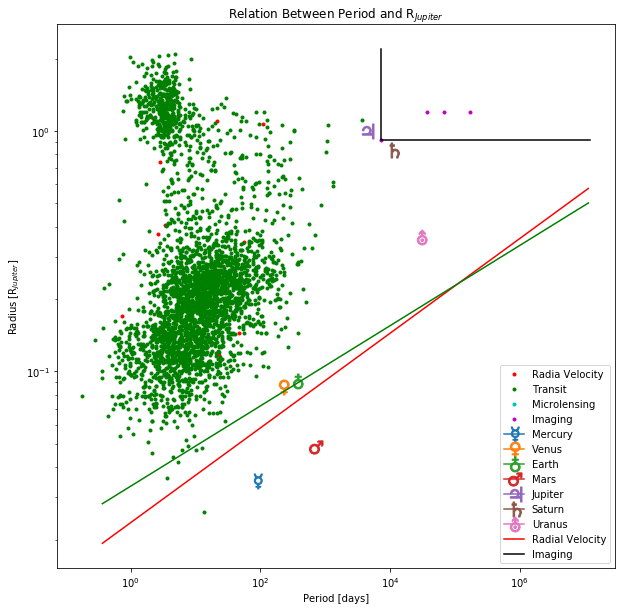

In [144]:
# Semi-Major axis plot
# pl_radj: Planet Radius [Jupiter Radius]
Radius_RadialVelocity = RadialVelocity["pl_radj"]
Radius_Transit = Transit["pl_radj"]
Radius_Microlensing = Microlensing["pl_radj"]
Radius_Imaging = Imaging["pl_radj"]
#Radius_TransitTimingVariations = TransitTimingVariations["pl_radj"]
#Radius_OrbitalBrightnessModulation = OrbitalBrightnessModulation["pl_radj"]

# make the plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plt.plot(Period_RadialVelocity, Radius_RadialVelocity, "r.", label='Radia Velocity')
plt.plot(Period_Transit, Radius_Transit, "g.", label='Transit')
plt.plot(Period_Microlensing, Radius_Microlensing, "c.", label='Microlensing')
plt.plot(Period_Imaging, Radius_Imaging, "m.", label='Imaging')
#plt.plot(Period_TransitTimingVariations, Radius_TransitTimingVariations, "y.")
#plt.plot(Period_OrbitalBrightnessModulation, Radius_OrbitalBrightnessModulation, "k.")

plt.plot(Period_Mercury, Radius_Mercury, marker='$\u263F$', ms=15, label= 'Mercury')
plt.plot(Period_Venus, Radius_Venus, marker='$\u2640$', ms=15, label= 'Venus')
plt.plot(Period_Earth, Radius_Earth, marker='$\u2641$', ms=15, label= 'Earth')
plt.plot(Period_Mars, Radius_Mars, marker='$\u2642$', ms=15, label= 'Mars')
plt.plot(Period_Jupiter, Radius_Jupiter, marker='$\u2643$', ms=15, label= 'Jupiter')
plt.plot(Period_Saturn, Radius_Saturn, marker='$\u2644$', ms=15, label= 'Saturn')
plt.plot(Period_Uranus, Radius_Uranus, marker='$\u26E2$', ms=15, label= 'Uranus')

# plot the radial velocity
plt.plot(period_arr.value, radius_arr, color="red", label='Radial Velocity')

# plot the imagin limitation
period_max = plt.gca().get_xlim()[1]
radius_j_max = plt.gca().get_ylim()[1]
plt.plot([period_min, period_min, period_max], [radius_j_max, radius_j_min, radius_j_min], color="black", label="Imaging" )

# plot the transit limitation
PlanetRadius_transit1= (period_arr/(365 * u.day))**(1/6) * u.earthRad
plt.plot(period_arr.value, PlanetRadius_transit1.to(u.jupiterRad).value, color = 'green')

# define the scale of the plot
plt.xscale("log")
plt.yscale("log")

# add the title 
plt.title('Relation Between Period and R$_{Jupiter}$')

# labels for x and y axis
plt.xlabel("Period [days]")
plt.ylabel(R"Radius [R$_{Jupiter}$]")

# show the plot
ax.legend()

plt.savefig("3.png")

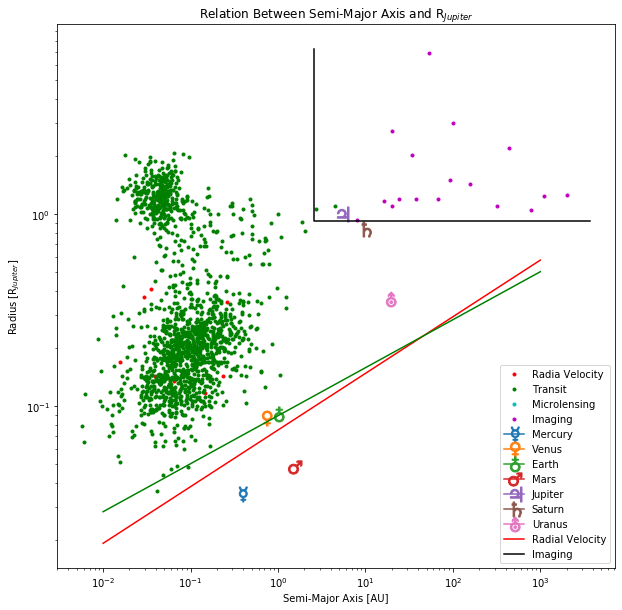

In [145]:
# Radius - Period plot

# pl_radj: Planet Radius [Jupiter Radius]
Radius_RadialVelocity = RadialVelocity["pl_radj"]
Radius_Transit = Transit["pl_radj"]
Radius_Microlensing = Microlensing["pl_radj"]
Radius_Imaging = Imaging["pl_radj"]
#Radius_TransitTimingVariations = TransitTimingVariations["pl_radj"]
#Radius_OrbitalBrightnessModulation = OrbitalBrightnessModulation["pl_radj"]

# make the plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plt.plot(SemiMajor_Axis_RadialVelocity, Radius_RadialVelocity, "r.", label='Radia Velocity')
plt.plot(SemiMajor_Axis_Transit, Radius_Transit, "g.", label='Transit')
plt.plot(SemiMajor_Axis_Microlensing, Radius_Microlensing, "c.", label='Microlensing')
plt.plot(SemiMajor_Axis_Imaging, Radius_Imaging, "m.", label='Imaging')
#plt.plot(SemiMajor_Axis_TransitTimingVariations, Radius_TransitTimingVariations, "y.")
#plt.plot(SemiMajor_Axis_OrbitalBrightnessModulation, Radius_OrbitalBrightnessModulation, "k.")

plt.plot(SemiMajor_Axis_Mercury, Radius_Mercury, marker='$\u263F$',ms=15, label= 'Mercury')
plt.plot(SemiMajor_Axis_Venus, Radius_Venus, marker='$\u2640$',ms=15, label= 'Venus')
plt.plot(SemiMajor_Axis_Earth, Radius_Earth, marker='$\u2641$',ms=15, label= 'Earth')
plt.plot(SemiMajor_Axis_Mars, Radius_Mars, marker='$\u2642$',ms=15, label= 'Mars')
plt.plot(SemiMajor_Axis_Jupiter, Radius_Jupiter, marker='$\u2643$',ms=15, label= 'Jupiter')
plt.plot(SemiMajor_Axis_Saturn, Radius_Saturn, marker='$\u2644$',ms=15, label= 'Saturn')
plt.plot(SemiMajor_Axis_Uranus, Radius_Uranus, marker='$\u26E2$',ms=15, label= 'Uranus')

# plot the radial velocity
plt.plot(sma_arr.value, radius_arr, color="red", label='Radial Velocity')

# plot the imagin limitation
period_max = plt.gca().get_xlim()[1]
radius_j_max = plt.gca().get_ylim()[1]
plt.plot([sma_min, sma_min, sma_max], [radius_j_max, radius_j_min, radius_j_min], color="black", label="Imaging" )

# plot the transit limitation
PlanetRadius_transit2 = (sma_arr/ u.AU)**(1/4) * u.earthRad
plt.plot(sma_arr.value, PlanetRadius_transit2.to(u.jupiterRad).value, color = 'green')

# define the scale of the plot
plt.xscale("log")
plt.yscale("log")

# add the title 
plt.title('Relation Between Semi-Major Axis and R$_{Jupiter}$')

# labels for x and y axis
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(R"Radius [R$_{Jupiter}$]")

# show the plot
ax.legend()

plt.savefig("4.png")